<center> <h2> DS 3000 - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Predicing Used Car Prices</h3> </center>
<center><h4>Julia Nitschke and Nick Hu</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

        In summary, we took data from vehicles listings from Craglist.org. First we remove all the cars that have passed the usage of 500,000 milages as well as price over 150,000 dollars to guarantee clean data. In order to prevent data duplications, we  combined the model and year columns to one single column and drop duplicates if there is one.For preprocessing the datasets, we use one-hot encoding to represent categorical variables. Using minmax scaler to make sure the scaling is correct. For feature selections, we use the linear regression algorithm to select which feature is important for our analysis. Next step, we put all the selected features into a dataframe and used heatmap, boxplot, and scatter plot to represent the correlation among the features and the price. We then choose to use pearson correlation to determine whether if there are any correlations between the year and price as well the odemeter and price. 


<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

**Problem statement:**

The used car market is very interesting — new cars lose value very quickly, almost immediately after being bought and driven out the parking lot. Their age isn’t the only factor in their pricing though and many other features of the car determine the price. People that want to sell their car need to make decisions about how to competitively price their vehicle. Based on this, our project is about predicting the prices of used cars. We want to learn which elements of a car are the biggest drivers of price, and how one could optimize their car’s features to get the most money for it.

**Significance of the Problem:**

It is important to tackle this problem to help the market operate more efficiently and competitively. Ensuring competitive pricing means that sellers have more fair opportunities and helps to keep the market in equilibrium. The insights from this project could help people to make decisions about how to price their car, and also to help people make buying decisions about which prices are in line with the market.

**Questions/Hypothesis:**

Given the above issue and use cars, we have the following questions and hypotheses:

Hypothesis 1:

Is the age of the car correlated linearly with the price of the car?

- H0 (null) = age of the car is not correlated linearly with the price of the car
- H1 (alternative) = age of the car is correlated linearly with the price of the car


Hypothesis 2:

Is the mileage on the car correlated linearly with the price of the car?
- H0 (null) = mileage (odometer reading) of the car is not correlated linearly to the price of the car
- H1 (alternative) = mileage (odometer reading) of the car is correlated linearly to the price of the car

Question: 

Which regression model can best predict the price of a used car? We will be testing Linear Regression, Lasso, Ridge, and k-Nearest Neighbors.

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1 Data Acquisition

**Data source:**

We obtained our data from Kaggle. The dataset we used (https://www.kaggle.com/austinreese/craigslist-carstrucks-data) was created by scraping used car postings on Craigslist in the United States.

Our data is stored in GitHub: https://github.com/julesnits/used_cars/blob/master/vehicles_trimmed.csv


**Dataaset description:**

The dataset contains the price of a used car as well as many elements and characteristics of the car. The dataset has 458,213 rows and 24 columns (we deleted 3 of the columns in the original Kaggle CSV because they made the file too large to upload to GitHub. These columns were url, image_url, and description, which are not helpful for our project.)

**Dataset variables:**

The following is the columns in our dataset.
- id: unique identifier for vehicle posting on Craigslist
- region: region that the posting is sold in
- region_url: Craigslist URL for that region
- price: car price
- year: year the car was made
- manufacturer: vehicle manufacturer
- model: vehicle model
- condition: the overall state/condition of the vehicle
- cylinders: number of cylinders in the car
- fuel: what kind of fuel the car takes (i.e. gas, diesel)
- odometer: mileage on the car
- title_status: the status of the title
- transmission: type of transmission (i.e. automatic, manual)
- VIN: VIN number
- drive: what type of drive (i.e. 4 wheel drive, rear wheel drive)
- size: size of vehicle (i.e. mid-size, full-size)
- type: car type (i.e. sedan, SUV, pickup)
- paint_color: car’s color
- state: state sold in
- lat: latitude of selling location
- long: longitude of selling location
- posting_date: date of Craigslist posting 


### 2.2 Data Analysis

**Hypotheses Variables:**

Hypothesis 1:
- IV: age of car (year)
- DV: price of car

Hypothesis 2:
- IV: mileage on car (odometer)
- DV: price of car

**Predictive Model:**

Our ML question is trying to predict the outcome variable of price. To predict this, we will look to use all of the feature variables described above. We think that the car’s year and mileage are the most important predictors because they are the things that tend to change more from their baseline as time goes on.

**Supervised Regression:**

This is a supervised ML problem because we have feature and target variables and are looking to be able to use this data to predict future target variables. We have input variables mapped to output variables (labeled data), and seek to create a model that can best predict that mapping. This is a regression problem because the outcome variable is a continuous value. 

**Machine Learning Algorithms:**

Initially, we will use the K-Nearest Neighbor clustering regression analysis because it seemed to be the most accurate in the lectures. We are also leaning towards Ridge or Lasso over Linear Regression so we cane tune the hyperparameters. We think Lasso may be a good fit because it is best used when many features but only a few expected to be important, which is the case here. Given the uncertainty of which will perform best, we will test various regression techniques to see which is most accurate: Linear Regression, Ridge, Lasso, and k-Nearest Neighbor Regressor.


<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/julesnits/used_cars/master/vehicles_trimmed.csv")

In [ ]:
data

### Data cleaning

In [ ]:
# drop NA values
df = data.copy().dropna()
df = df.drop_duplicates()

In [16]:
# looks like the odometer column has a potential outlier
df.describe()

,Unnamed: 0,Unnamed: 0.1,id,price,year,odometer,lat,long
count,42385.000000,42385.000000,4.238500e+04,4.238500e+04,42385.000000,4.238500e+04,42385.000000,42385.000000
mean,226297.779592,226297.779592,7.235361e+09,1.453084e+04,2011.031757,1.544473e+05,38.624541,-92.190493
std,128908.013493,128908.013493,4.459727e+06,1.074688e+05,6.782395,9.927048e+06,5.609999,17.351099
min,19.000000,19.000000,7.224683e+09,0.000000e+00,1927.000000,0.000000e+00,-1.121187,-159.365637
25%,114783.000000,114783.000000,7.232344e+09,5.950000e+03,2008.000000,6.314400e+04,34.900670,-98.615578
50%,221928.000000,221928.000000,7.236583e+09,1.099500e+04,2012.000000,1.015570e+05,39.286850,-86.769666
75%,336675.000000,336675.000000,7.239357e+09,1.899000e+04,2015.000000,1.397550e+05,42.504823,-79.728200
max,458211.000000,458211.000000,7.241017e+09,2.200000e+07,2021.000000,2.043756e+09,64.823942,94.163200


In [17]:
# remove values where the car has more than 500,000 miles 
# and remove cars where more than 150,000 dollars to get rid of outliers
# or possible messy data
df = df[(df['odometer'] < 500000) & (df['price'] < 150000)]

In [18]:
# drop columns that don't provide value or provide duplicate information (i.e. region duplicated lat/long data)
df.reset_index(inplace = True)
df.drop(columns = ['index', 'Unnamed: 0', 'Unnamed: 0.1','region',  'region_url', 'VIN', 'state','posting_date'], inplace = True)
df.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
0,7235942858,47000,2020.0,jeep,gladiator,like new,6 cylinders,gas,10500.0,clean,automatic,4wd,full-size,pickup,grey,32.611442,-85.481615
1,7240569685,24999,2016.0,mercedes-benz,benz c300 4matic,like new,4 cylinders,gas,18823.0,clean,automatic,rwd,full-size,sedan,white,34.206619,-84.777696
2,7240567296,41900,2016.0,jeep,wrangler,good,6 cylinders,gas,13036.0,clean,automatic,4wd,full-size,SUV,white,34.466560,-85.358940
3,7240566811,23900,2005.0,gmc,sierra 3500,good,8 cylinders,diesel,145970.0,clean,automatic,4wd,full-size,truck,white,34.466560,-85.358940
4,7240566722,18900,2012.0,chevrolet,silverado 3500hd,good,8 cylinders,diesel,177450.0,clean,automatic,rwd,full-size,truck,white,34.466560,-85.358940


In [19]:
df.columns

Index(['id', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'lat', 'long'],
      dtype='object')

In [20]:
# looking at number of unique number of values for each column
df.nunique()

id              42302
price            3773
year               86
manufacturer       41
model            6049
condition           6
cylinders           8
fuel                5
odometer        20749
title_status        6
transmission        3
drive               3
size                4
type               13
paint_color        12
lat             10733
long            10657
dtype: int64

In [21]:
df

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
0,7235942858,47000,2020.0,jeep,gladiator,like new,6 cylinders,gas,10500.0,clean,automatic,4wd,full-size,pickup,grey,32.611442,-85.481615
1,7240569685,24999,2016.0,mercedes-benz,benz c300 4matic,like new,4 cylinders,gas,18823.0,clean,automatic,rwd,full-size,sedan,white,34.206619,-84.777696
2,7240567296,41900,2016.0,jeep,wrangler,good,6 cylinders,gas,13036.0,clean,automatic,4wd,full-size,SUV,white,34.466560,-85.358940
3,7240566811,23900,2005.0,gmc,sierra 3500,good,8 cylinders,diesel,145970.0,clean,automatic,4wd,full-size,truck,white,34.466560,-85.358940
4,7240566722,18900,2012.0,chevrolet,silverado 3500hd,good,8 cylinders,diesel,177450.0,clean,automatic,rwd,full-size,truck,white,34.466560,-85.358940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42297,7240979817,0,2015.0,jeep,wrangler unlimited sahara,excellent,6 cylinders,gas,70885.0,clean,automatic,4wd,full-size,SUV,red,42.857878,-88.309457
42298,7240981040,20488,2010.0,gmc,sierra 1500,excellent,8 cylinders,gas,63812.0,clean,automatic,4wd,mid-size,truck,black,44.078180,-87.696800
42299,7240989873,4995,2005.0,buick,rendezvous cx,good,6 cylinders,gas,137962.0,clean,automatic,fwd,compact,SUV,grey,44.631225,-90.022076
42300,7240975107,4495,2006.0,buick,lacrosse cx,good,6 cylinders,gas,121488.0,clean,automatic,fwd,mid-size,sedan,black,44.631225,-90.022076


In [22]:
# create column of model and year
df['model_year'] = df['model'] + "_" + df['year'].astype('str')

# check for unique values in this column
df['model_year'].nunique()

13972

In [23]:
# look at df by model_year
df.sort_values(by = ['model_year'])

# drop duplicates where multiple cars with many of the same features
df1 = df[['model_year', 'price', 'condition', 'fuel', 'title_status','cylinders', 'drive', 'odometer', 'size','type', 'paint_color']].drop_duplicates()
df

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,model_year
0,7235942858,47000,2020.0,jeep,gladiator,like new,6 cylinders,gas,10500.0,clean,automatic,4wd,full-size,pickup,grey,32.611442,-85.481615,gladiator_2020.0
1,7240569685,24999,2016.0,mercedes-benz,benz c300 4matic,like new,4 cylinders,gas,18823.0,clean,automatic,rwd,full-size,sedan,white,34.206619,-84.777696,benz c300 4matic_2016.0
2,7240567296,41900,2016.0,jeep,wrangler,good,6 cylinders,gas,13036.0,clean,automatic,4wd,full-size,SUV,white,34.466560,-85.358940,wrangler_2016.0
3,7240566811,23900,2005.0,gmc,sierra 3500,good,8 cylinders,diesel,145970.0,clean,automatic,4wd,full-size,truck,white,34.466560,-85.358940,sierra 3500_2005.0
4,7240566722,18900,2012.0,chevrolet,silverado 3500hd,good,8 cylinders,diesel,177450.0,clean,automatic,rwd,full-size,truck,white,34.466560,-85.358940,silverado 3500hd_2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42297,7240979817,0,2015.0,jeep,wrangler unlimited sahara,excellent,6 cylinders,gas,70885.0,clean,automatic,4wd,full-size,SUV,red,42.857878,-88.309457,wrangler unlimited sahara_2015.0
42298,7240981040,20488,2010.0,gmc,sierra 1500,excellent,8 cylinders,gas,63812.0,clean,automatic,4wd,mid-size,truck,black,44.078180,-87.696800,sierra 1500_2010.0
42299,7240989873,4995,2005.0,buick,rendezvous cx,good,6 cylinders,gas,137962.0,clean,automatic,fwd,compact,SUV,grey,44.631225,-90.022076,rendezvous cx_2005.0
42300,7240975107,4495,2006.0,buick,lacrosse cx,good,6 cylinders,gas,121488.0,clean,automatic,fwd,mid-size,sedan,black,44.631225,-90.022076,lacrosse cx_2006.0


In [24]:
# group by the key features to find an average price, lat, and long
df_agg = df.groupby(by = ['model_year', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color']).mean()

# reset index
df_agg.reset_index(inplace = True)

# drop id column that we no longer need
df_agg.drop(columns = ['id'], inplace = True)
df_agg

,model_year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price,year,lat,long
0,(300)_2006.0,good,8 cylinders,gas,14000.0,clean,automatic,4wd,full-size,other,white,10000.0,2006.0,40.894300,-73.977200
1,- galaxie_1959.0,excellent,8 cylinders,gas,40964.0,clean,manual,rwd,full-size,sedan,black,20590.0,1959.0,35.010800,-80.926600
2,-350 refrigerated box_2009.0,like new,8 cylinders,hybrid,32250.0,clean,automatic,fwd,full-size,truck,white,14995.0,2009.0,42.659300,-83.122500
3,/ edge_2016.0,excellent,4 cylinders,gas,79080.0,clean,automatic,4wd,mid-size,SUV,blue,16900.0,2016.0,44.358000,-69.867000
4,1 series_2010.0,good,6 cylinders,gas,89000.0,clean,automatic,rwd,compact,coupe,black,9500.0,2010.0,41.599400,-86.707700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28540,zdx_2011.0,good,6 cylinders,gas,125697.0,clean,automatic,4wd,mid-size,coupe,white,14995.0,2011.0,41.458309,-81.779049
28541,zdx_2011.0,like new,6 cylinders,gas,54000.0,clean,automatic,4wd,mid-size,SUV,white,17000.0,2011.0,46.403712,-117.055301
28542,zephyr_2006.0,excellent,6 cylinders,gas,64000.0,clean,automatic,fwd,mid-size,sedan,black,6800.0,2006.0,34.828500,-82.351600
28543,zephyr_2006.0,like new,6 cylinders,gas,89231.0,clean,automatic,fwd,full-size,sedan,grey,4450.0,2006.0,41.670181,-72.934584


### Preprocess variables

In [25]:
# create dataframe that contains columns that need to be One Hot Encoded
encoded_features = df_agg[['condition','cylinders', 'fuel', 
                           'title_status', 'transmission','drive', 
                           'size', 'type', 'paint_color']]


# one hot encode the categorical variables
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)
encoded_df = encoder.fit_transform(encoded_features)

encoded_features_df = pd.DataFrame(encoded_df, columns = encoder.get_feature_names())
encoded_features_df.head()

,x0_excellent,x0_fair,x0_good,x0_like new,x0_new,x0_salvage,x1_10 cylinders,x1_12 cylinders,x1_3 cylinders,x1_4 cylinders,x1_5 cylinders,x1_6 cylinders,x1_8 cylinders,x1_other,x2_diesel,x2_electric,x2_gas,x2_hybrid,x2_other,x3_clean,x3_lien,x3_missing,x3_parts only,x3_rebuilt,x3_salvage,x4_automatic,x4_manual,x4_other,x5_4wd,x5_fwd,x5_rwd,x6_compact,x6_full-size,x6_mid-size,x6_sub-compact,x7_SUV,x7_bus,x7_convertible,x7_coupe,x7_hatchback,x7_mini-van,x7_offroad,x7_other,x7_pickup,x7_sedan,x7_truck,x7_van,x7_wagon,x8_black,x8_blue,x8_brown,x8_custom,x8_green,x8_grey,x8_orange,x8_purple,x8_red,x8_silver,x8_white,x8_yellow
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# create dataframe that contains columns that need to be binned
discretizer_features = df_agg[['lat', 'long']]

from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins = 5, encode = "onehot-dense", strategy = "quantile")

latlong_discretized = discretizer.fit_transform(discretizer_features)

kbins_features_df = pd.DataFrame(latlong_discretized, columns = ["lat1", "lat2", "lat3", "lat4", "lat5",
                                                        "long1", "long2", "long3", "long4", "long5"])
kbins_features_df.head()

,lat1,lat2,lat3,lat4,lat5,long1,long2,long3,long4,long5
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
# create dataframe with columns that are ready to use
standardize_features = df_agg['odometer'].values.reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler

#create the scaler
scaler = MinMaxScaler()

#fit the scaler to the training data(features only)
scaler.fit(standardize_features) 

standardize_features_array = scaler.transform(standardize_features) 
standardize_features_df = pd.DataFrame(standardize_features_array, columns = ['odometer'])
standardize_features_df.describe()

,odometer
count,28545.000000
mean,0.238265
std,0.130314
min,0.000000
25%,0.145272
50%,0.232217
75%,0.319888
max,1.000000


In [28]:
# create dataframe with columns that are ready to use
reg_features_df = df_agg[['price', 'year']]

In [29]:
merged_df = encoded_features_df.merge(kbins_features_df, left_index = True, right_index = True).merge(
    standardize_features_df, left_index = True, right_index = True).merge(
    reg_features_df, left_index = True, right_index = True)

merged_df

,x0_excellent,x0_fair,x0_good,x0_like new,x0_new,x0_salvage,x1_10 cylinders,x1_12 cylinders,x1_3 cylinders,x1_4 cylinders,x1_5 cylinders,x1_6 cylinders,x1_8 cylinders,x1_other,x2_diesel,x2_electric,x2_gas,x2_hybrid,x2_other,x3_clean,x3_lien,x3_missing,x3_parts only,x3_rebuilt,x3_salvage,x4_automatic,x4_manual,x4_other,x5_4wd,x5_fwd,x5_rwd,x6_compact,x6_full-size,x6_mid-size,x6_sub-compact,x7_SUV,x7_bus,x7_convertible,x7_coupe,x7_hatchback,x7_mini-van,x7_offroad,x7_other,x7_pickup,x7_sedan,x7_truck,x7_van,x7_wagon,x8_black,x8_blue,x8_brown,x8_custom,x8_green,x8_grey,x8_orange,x8_purple,x8_red,x8_silver,x8_white,x8_yellow,lat1,lat2,lat3,lat4,lat5,long1,long2,long3,long4,long5,odometer,price,year
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.031289,10000.0,2006.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.091553,20590.0,1959.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.072078,14995.0,2009.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.176741,16900.0,2016.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.198912,9500.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28540,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.280928,14995.0,2011.0
28541,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.120688,17000.0,2011.0
28542,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.143038,6800.0,2006.0
28543,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.199428,4450.0,2006.0


In [30]:
# ensure original DataFrames have same shape as new merged DataFrame
[encoded_features_df.shape, kbins_features_df.shape, standardize_features_df.shape, reg_features_df.shape]

[(28545, 60), (28545, 10), (28545, 1), (28545, 2)]

### Feature selection

In [31]:
target = merged_df['price']
features = merged_df.drop('price', axis=1)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)


In [33]:
#define a selection method and specify the score function to be f_regression
select = SelectKBest(score_func = f_regression, k = 10)
select.fit(X_train, y_train)

#transform training and testing sets so only the selected features are retained
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression().fit(X=X_train, y=y_train)

print("Original results:")
print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train)))
print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test)))


model = LinearRegression().fit(X=X_train_selected, y=y_train)

print("With selected features:")
print("\tR-squared value for training set: ", r2_score(y_train, model.predict(X_train_selected)))
print("\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test_selected)))

Original results:
	R-squared value for training set:  0.48028506266785953
	R-squared value for testing set:  0.47354815316743537
With selected features:
	R-squared value for training set:  0.44820698564296035
	R-squared value for testing set:  0.4374297071043187


In [35]:
select.get_support()

array([False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True])

In [36]:
cols = pd.DataFrame(list(select.get_support()), list(features.columns))
selected_features = cols[cols[0] == True]

In [37]:
selected_features.reset_index()

,index,0
0,x1_4 cylinders,True
1,x1_8 cylinders,True
2,x2_diesel,True
3,x2_gas,True
4,x5_4wd,True
5,x5_fwd,True
6,x7_sedan,True
7,x7_truck,True
8,odometer,True
9,year,True


In [38]:
selected_columns = pd.DataFrame(selected_features).reset_index()

In [39]:
# create list of columns to keep
selected_list = list(selected_columns['index'])
selected_list.append('price')

In [40]:
# limit dataframe to only features identified in the feature selection as well as target variable
selected_features_merged_df = merged_df[selected_list]
selected_features_merged_df

,x1_4 cylinders,x1_8 cylinders,x2_diesel,x2_gas,x5_4wd,x5_fwd,x7_sedan,x7_truck,odometer,year,price
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.031289,2006.0,10000.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.091553,1959.0,20590.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.072078,2009.0,14995.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.176741,2016.0,16900.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.198912,2010.0,9500.0
...,...,...,...,...,...,...,...,...,...,...,...
28540,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.280928,2011.0,14995.0
28541,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.120688,2011.0,17000.0
28542,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.143038,2006.0,6800.0
28543,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.199428,2006.0,4450.0


### 3.2. Data Exploration
* Generate appropriate data visualizations for your key variables identified in the previous section
* You should have at least three visualizations (and at least two different visualization types)
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph.
* If you are using Plotly, insert your visualizations as images as well (upload the graph images to an online source, e.g. github, and embed those into the cells in Jupyter Notebook). This is a requirement.


In [2]:
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


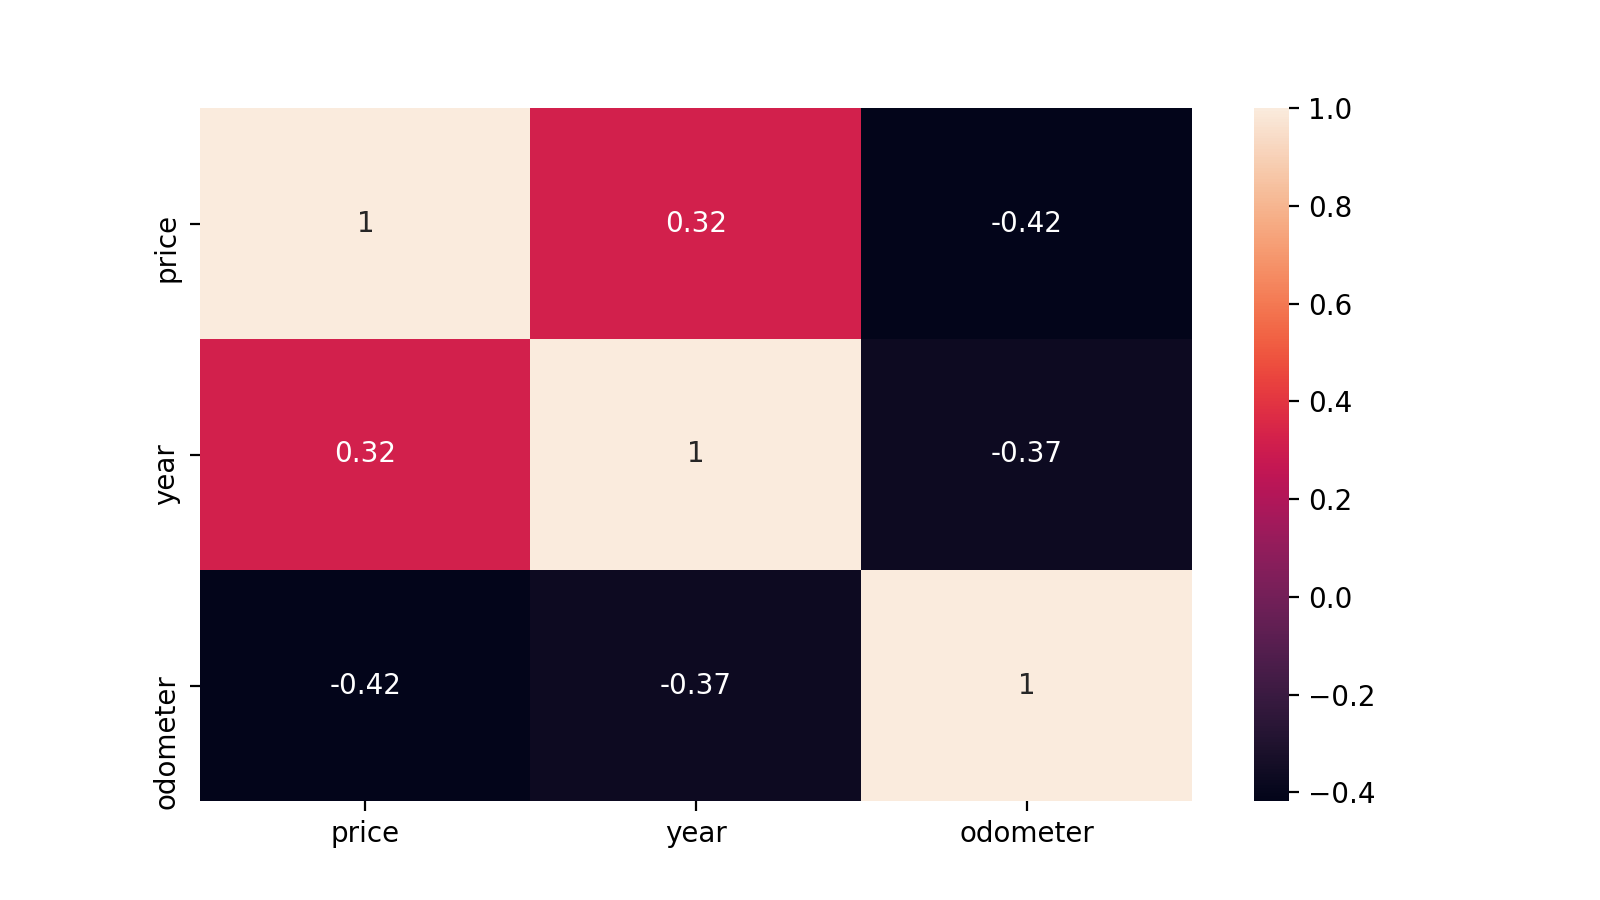

<AxesSubplot:>

In [42]:
quant = merged_df[['price', 'year', 'odometer']]
plt.figure(figsize=(8, 4.5)) 
sns.heatmap(quant.corr(), annot=True)

#### Heatmap Interpretation:
Using heatmap to represent the sensitvity of year, odometer over price. As we can see, the year shows a positive correlation with the price while the odometer shows a negative correlation with the price. 

In [1]:
# visualize quantitive data (year and odometer) in box and whisker plot
for feature in quant.columns[1:]:
    plt.figure(figsize=(8, 4.5))  
    sns.boxplot(data=selected_features_merged_df, x = feature)

NameError: name 'quant' is not defined

#### Boxplot Interpretation:
Figure2 shows a large number of outliers before 1995. The pricing is in relatively small range.  

<IPython.core.display.Javascript object>


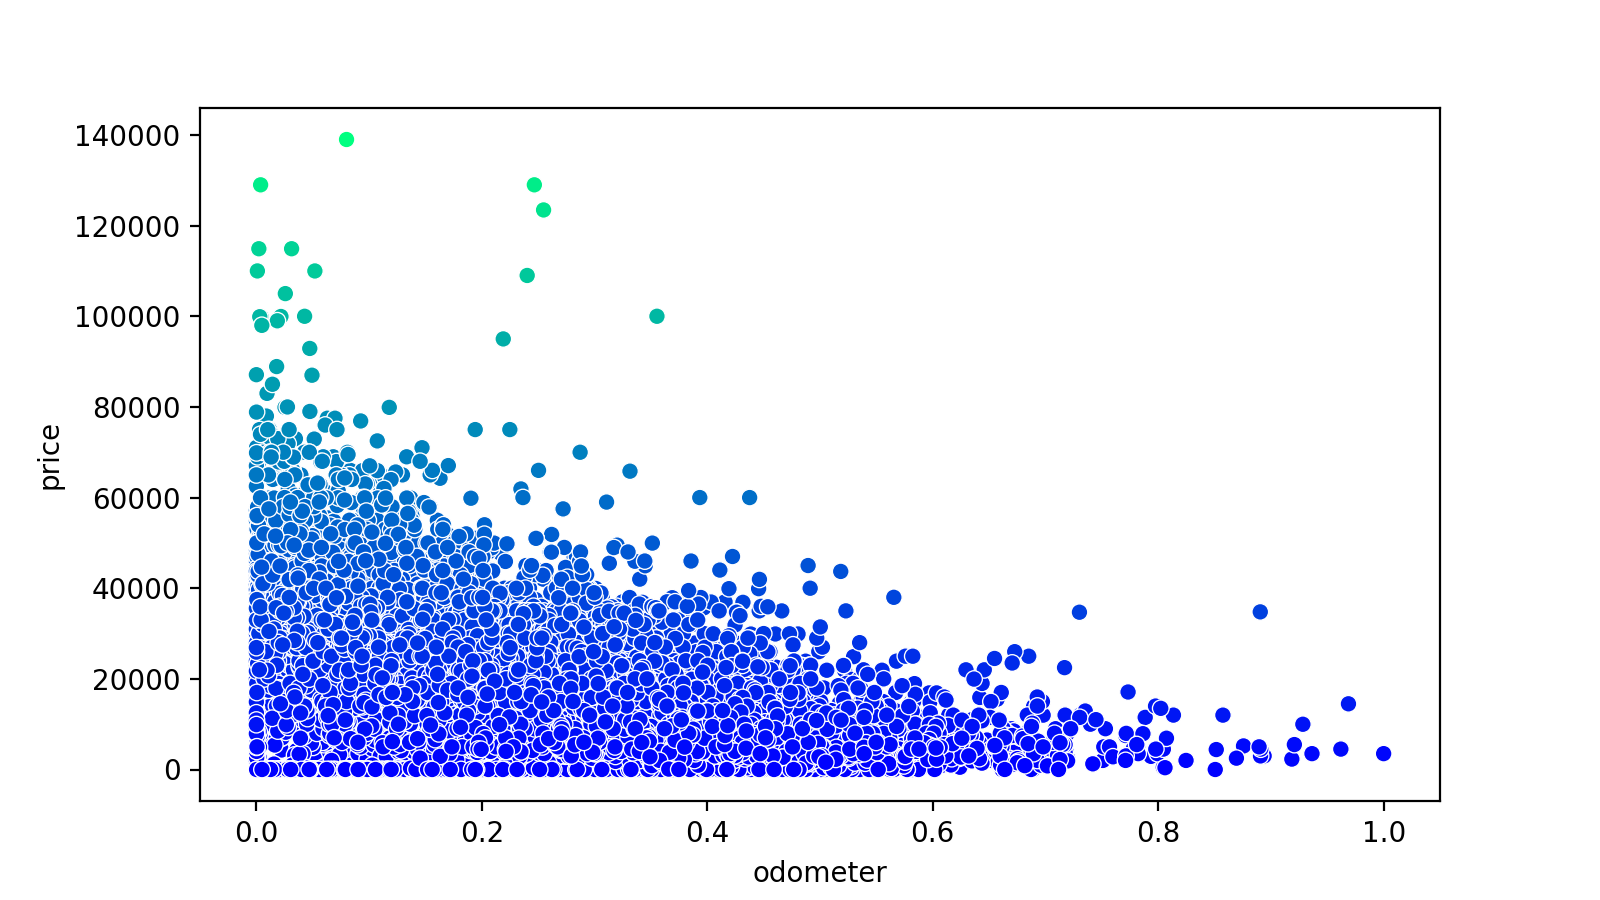

<IPython.core.display.Javascript object>


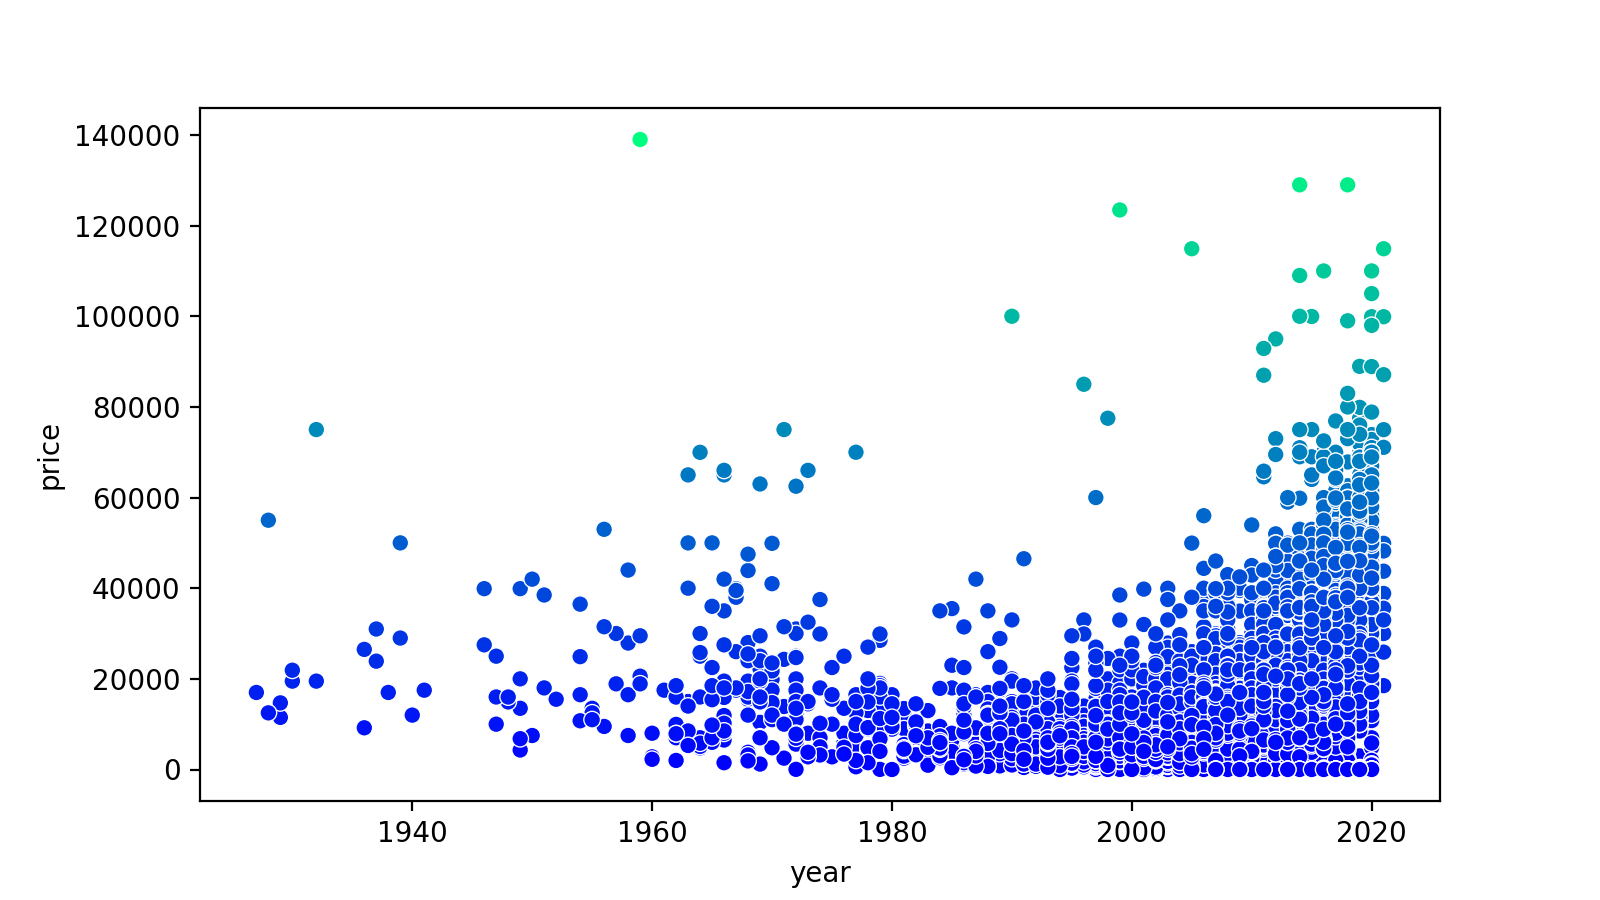

In [44]:
# visualize all features against the target variable
for feature in selected_features_merged_df.columns[8:10]:
    plt.figure(figsize=(8, 4.5))  
    sns.scatterplot(data=selected_features_merged_df, x=feature, y='price', hue='price', palette='winter', legend=False)

#### Scatter Plot Interpretation:
Figure 4 shows a negative correlation between odometer and price while Figure shows a positive correlation between price and year.  

In [ ]:
# visualize all features against the target variable using bar chart 
for feature in selected_features_merged_df.columns[8:10]:
    plt.figure(figsize=(8, 4.5))  
    sns.barplot(data=selected_features_merged_df, x=feature, y='price', hue='price', palette='winter', legend=False)

### 3.3. Model Construction

#### Hypothesis Testing

The hypothesis test we chose to use is the Pearson test of linear correlation because in our hypotheses tests, we are interested in whether there is a correlation between the independent and dependent variables.

In [45]:
from scipy import stats

def corr(df, IV, DV):
    r, p = stats.pearsonr(df[IV], df[DV])
    
    summary = df[IV].agg(["count", "mean", "std", "sem"])

    print (IV.title(), "and", DV, "correlation:")
    print("\t","Pearson's correlation coefficient: ", r)
    print("\t", "P-value: ", p)
    print("\n")
    print(IV.title(), "statistics:")
    print(summary)

In [47]:
# Hypothesis 1: Is the age of the car correlated linearly with the price of the car?
    # Null = age of the car is not correlated linearly with the price of the car
    # Alternative = age of the car is correlated linearly with the price of the car

corr(merged_df, 'year', 'price')

Year and price correlation:
	 Pearson's correlation coefficient:  0.3231745550260713
	 P-value:  0.0


Year statistics:
count    28545.000000
mean      2010.646628
std          7.173759
sem          0.042460
Name: year, dtype: float64


In [48]:
# Hypothesis 2: Is the mileage on the car correlated linearly with the price of the car?
    # Null = mileage (odometer reading) of the car is not correlated linearly to the price of the car
    # Alternative = mileage (odometer reading) of the car is correlated linearly to the price of the car
    
# Note that odometer metrics are standardized with MinMaxScaler
    
corr(merged_df, 'odometer', 'price')

Odometer and price correlation:
	 Pearson's correlation coefficient:  -0.41782337239221323
	 P-value:  0.0


Odometer statistics:
count    28545.000000
mean         0.238265
std          0.130314
sem          0.000771
Name: odometer, dtype: float64


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [50]:
# linear

def linear():

    model = LinearRegression().fit(X=X_train_selected, y=y_train)
    
    print('Linear Regression' + ": \n\t" + "R-squared value for training set:  " 
          + str(r2_score(y_train, model.predict(X_train_selected))),
          "\n\t"
          +"R-squared value for testing set:  "
          + str(r2_score(y_test, model.predict(X_test_selected)))
          + "\n")
        

In [51]:
linear()

Linear Regression: 
	R-squared value for training set:  0.44820698564296035 
	R-squared value for testing set:  0.4374297071043187



In [52]:
# ridge and lasso
param_grid_alpha = {"alpha": [.001,.01,.1,1,10,100]}

alpha_estimators = {
    'Ridge': Ridge(),
    'Lasso': Lasso(max_iter = 10000)}

#scoring = ['r2', 'neg_mean_squared_error']

def regressors_percentage_split():
    
    for estimator_name, estimator_object in alpha_estimators.items():

        grid_search = GridSearchCV(estimator_object, param_grid_alpha, cv = 10)#, scoring = scoring, refit = 'neg_mean_squared_error')
        
        #train the model using the training dataset
        model = grid_search.fit(X = X_train_selected, y = y_train)

        #result of grid search
        print(estimator_name + ":")

        print("\t","Best parameters: ", grid_search.best_params_)
        print("\t", "Best cross-validation score: ", grid_search.best_score_)

        #the performance of the best found parameters on the test set
        #this is what you report for the evaluation of your model
        print("\t","Test set score: ", grid_search.score(X_test_selected, y_test))

In [53]:
# ridge and lasso
param_grid_alpha = {"alpha": [.001,.01,.1,1,10,100]}

alpha_estimators = {
    'Ridge': Ridge(),
    'Lasso': Lasso(max_iter = 10000)}

#scoring = ['r2','neg_mean_squared_error']

def regressors_percentage_split():
    
    for estimator_name, estimator_object in alpha_estimators.items():

        grid_search = GridSearchCV(estimator_object, param_grid_alpha, cv = 10, scoring = 'r2')
        grid_search2 = GridSearchCV(estimator_object, param_grid_alpha, cv = 10, scoring = 'neg_mean_squared_error')
        
        #train the model using the training dataset
        model = grid_search.fit(X = X_train_selected, y = y_train)
        model = grid_search2.fit(X = X_train_selected, y = y_train)
        
        #result of grid search
        print(estimator_name + ":")

        print("\t","Best parameters: ", grid_search.best_params_)
        print("\t", "Best cross-validation R2 score: ", grid_search.best_score_)
        print("\t", "Best cross-validation Negative Mean Square Error score: ", grid_search2.best_score_)
        
        #the performance of the best found parameters on the test set
        #this is what you report for the evaluation of your model
        print("\n")
        print("\t","Training set score: ", grid_search.score(X_test_selected, y_test))
        print("\t","Test set score: ", grid_search.score(X_test_selected, y_test))

In [54]:
regressors_percentage_split()

Ridge:
	 Best parameters:  {'alpha': 1}
	 Best cross-validation R2 score:  0.4479794363455925
	 Best cross-validation Negative Mean Square Error score:  -70680126.53558621


	 Training set score:  0.4374822156891761
	 Test set score:  0.4374822156891761
Lasso:
	 Best parameters:  {'alpha': 1}
	 Best cross-validation R2 score:  0.44797555375786935
	 Best cross-validation Negative Mean Square Error score:  -70680137.8185907


	 Training set score:  0.4374779393982058
	 Test set score:  0.4374779393982058


In [55]:
# k-nearest neighbors
param_grid_knn = {"n_neighbors": [1,3,5,8,10,12,15,18,20,23], "metric" : ["euclidean","manhattan",'minkowski']}

def grid_search_kNN():

    # knn with praram grid and 10-fold evaluation
    grid_search = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv = 10, scoring = 'r2')
    grid_search2 = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv = 10, scoring = 'neg_mean_squared_error')

    #train the model using the training dataset
    model = grid_search.fit(X = X_train_selected, y = y_train)
    model = grid_search2.fit(X = X_train_selected, y = y_train)

    #result of grid search
    print('k-Nearest Neighbor' + ":")

    print("\t","Best parameters: ", grid_search.best_params_)
    print("\t", "Best cross-validation R2 score: ", grid_search.best_score_)
    print("\t", "Best cross-validation Negative Mean Square Error score: ", grid_search2.best_score_)

    #the performance of the best found parameters on the test set
    #this is what you report for the evaluation of your model
    print("\n")
    print("\t","Training set score: ", grid_search.score(X_test_selected, y_test))
    print("\t","Test set score: ", grid_search.score(X_test_selected, y_test))



In [56]:
grid_search_kNN()

k-Nearest Neighbor:
	 Best parameters:  {'metric': 'manhattan', 'n_neighbors': 23}
	 Best cross-validation R2 score:  0.5552431894475925
	 Best cross-validation Negative Mean Square Error score:  -56981863.23241683


	 Training set score:  0.5455073180427465
	 Test set score:  0.5455073180427465


### 3.4. Model Evaluation

#### Evaluate Performance

The linear regression, ridge, and lasso all performed similarly.
The k-Nearest Neighbor regressor performs the best, with the cross-validation score at .56. There may be indication of overfitting because the testing score is less than the training score.

In [57]:
linear()
print("\n")
regressors_percentage_split()
print("\n")
grid_search_kNN()

Linear Regression: 
	R-squared value for training set:  0.44820698564296035 
	R-squared value for testing set:  0.4374297071043187



Ridge:
	 Best parameters:  {'alpha': 1}
	 Best cross-validation R2 score:  0.4479794363455925
	 Best cross-validation Negative Mean Square Error score:  -70680126.53558621


	 Training set score:  0.4374822156891761
	 Test set score:  0.4374822156891761
Lasso:
	 Best parameters:  {'alpha': 1}
	 Best cross-validation R2 score:  0.44797555375786935
	 Best cross-validation Negative Mean Square Error score:  -70680137.8185907


	 Training set score:  0.4374779393982058
	 Test set score:  0.4374779393982058


k-Nearest Neighbor:
	 Best parameters:  {'metric': 'manhattan', 'n_neighbors': 23}
	 Best cross-validation R2 score:  0.5552431894475925
	 Best cross-validation Negative Mean Square Error score:  -56981863.23241683


	 Training set score:  0.5455073180427465
	 Test set score:  0.5455073180427465



#### Hypothesis Testing

*Test and Purpose:*

Two Pearson tests of linear correlation were conducted to determine if year and odometer and linearly correlated with price for used cars.

*Actual Results:*

Results revealed a statistically significant correlation between the two independent variables (year and odometer) and the dependent variable (price).

Year:
r = .32, p < .001

Odometer:
r = -.42, p < .001

*Interpretation:*

These results indicate that year is positively correlated with price and odometer (mileage) is negatively correlated with price. 

### 3.5. Model Optimization

Model tuning happens in 3.3 during the GridSearch step.

We tune with hyperparamters to choose the parameters that produce the best possible predictions. We balance the complexity of the model to ensure the model is not overfitted (too specific to training set) or underfitted (too general).

### 3.6. Model Testing

In [58]:
linear()
regressors_percentage_split()
grid_search_kNN()

Linear Regression: 
	R-squared value for training set:  0.44820698564296035 
	R-squared value for testing set:  0.4374297071043187

Ridge:
	 Best parameters:  {'alpha': 1}
	 Best cross-validation R2 score:  0.4479794363455925
	 Best cross-validation Negative Mean Square Error score:  -70680126.53558621


	 Training set score:  0.4374822156891761
	 Test set score:  0.4374822156891761
Lasso:
	 Best parameters:  {'alpha': 1}
	 Best cross-validation R2 score:  0.44797555375786935
	 Best cross-validation Negative Mean Square Error score:  -70680137.8185907


	 Training set score:  0.4374779393982058
	 Test set score:  0.4374779393982058
k-Nearest Neighbor:
	 Best parameters:  {'metric': 'manhattan', 'n_neighbors': 23}
	 Best cross-validation R2 score:  0.5552431894475925
	 Best cross-validation Negative Mean Square Error score:  -56981863.23241683


	 Training set score:  0.5455073180427465
	 Test set score:  0.5455073180427465


<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION


#### _Interpretation and Summary_
        In summary, we took data from vehicles listings from Craglist.org. First we remove all the cars that have passed the usage of 500,000 milages as well as price over 150,000 dollars to guarantee clean data. In order to prevent data duplications, we  combined the model and year columns to one single column and drop duplicates if there is one.For preprocessing the datasets, we use one-hot encoding to represent categorical variables. 
        
        Using minmax scaler to make sure the scaling is correct. For feature selections, we use the linear regression algorithm to select which feature is important for our analysis. Next step, we put all the selected features into a dataframe and used heatmap, boxplot, and scatter plot to represent the correlation among the features and the price. We then choose to use pearson correlation to determine whether if there are any correlations between the year and price as well the odemeter and price. 
        
        We compared Linear Regression, Ridge, Lasso, and KNeigbhorsRegressor algorithm. KNeighborsRegressor algorithm turned out to perform the best since it had the highest R square score, and then we decided to use KNeighborsRegressor for our predictive model.
        
        Based on our findings, the selected features are feasible to predict the outcome variable we identifies using KNeighborsRegressor. Results revealed a statistically significant correlation between the two independent variables (year and odometer) and the dependent variable (price).These results indicate that year is positively correlated with price and odometer (mileage) is negatively correlated with price.

#### _Future Work_###
        We highly recomemend for future work looking into more factors that contain much more effective information on used car pricing. For example, we could use sentiment analysis on the feedback of car sale platform such as carMax or autotrade to look for what are the incentives for the customers to actually purchase the vehicle. Elements include the utility of the car engines or the depreciation rate of certain car brand. However, we do not recommend using as much data as possible since there are always outliers that could potentially skew the data trends. 
        
        In addtion to more factors, we would suggest that looking more into causation rather than correlation because the pricing is strongly effected by the factors that affect customer's incentives to purchase. 

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
* Describe each team member's contributions to the report (who did what in each section)
* Remember this is a team effort!
* Each member of your team will provide peer evaluation of other team members. Your final grade on the project will be based on those peer evaluations. A survey will be shared after the deadline for this deliverable.